# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame, # Display the data table for preview
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID") 
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = mouse_study_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_data[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
specific_id = "g989"
cleaned_dataframe = mouse_study_data.drop(mouse_study_data[mouse_study_data["Mouse ID"] == specific_id].index)
cleaned_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = cleaned_dataframe["Mouse ID"].nunique()
number_of_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = mouse_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics.columns= [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
]

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = mouse_study_data.groupby("Drug Regimen").agg(
    mean = ("Tumor Volume (mm3)", "mean"),
    median = ("Tumor Volume (mm3)", "median"),
    variance = ("Tumor Volume (mm3)", "var"),
    std_dev = ("Tumor Volume (mm3)", "std"),
    std_err = ("Tumor Volume (mm3)", "sem")
)

summary_statistics

,mean,median,variance,std_dev,std_err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

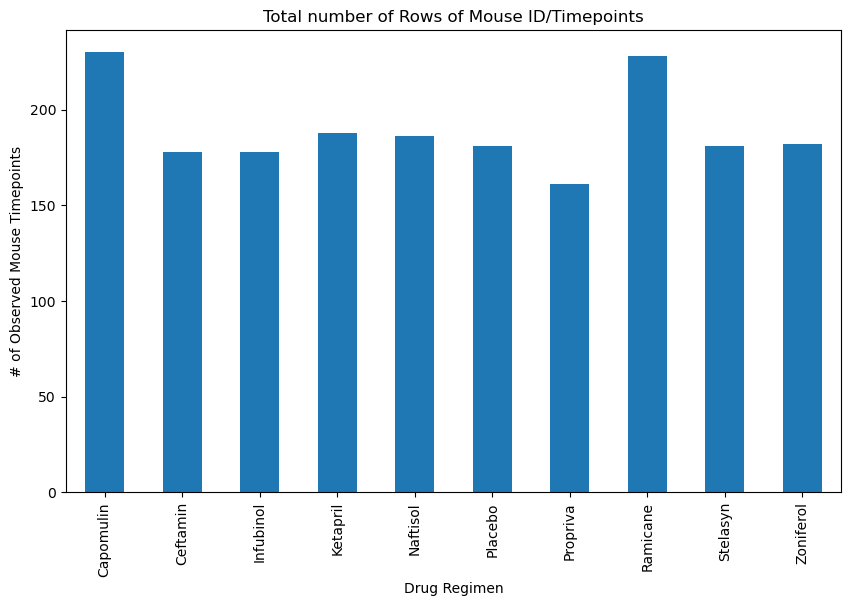

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts_pandas = mouse_study_data.groupby("Drug Regimen").size()

drug_counts_pandas.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of Rows of Mouse ID/Timepoints")
plt.show()

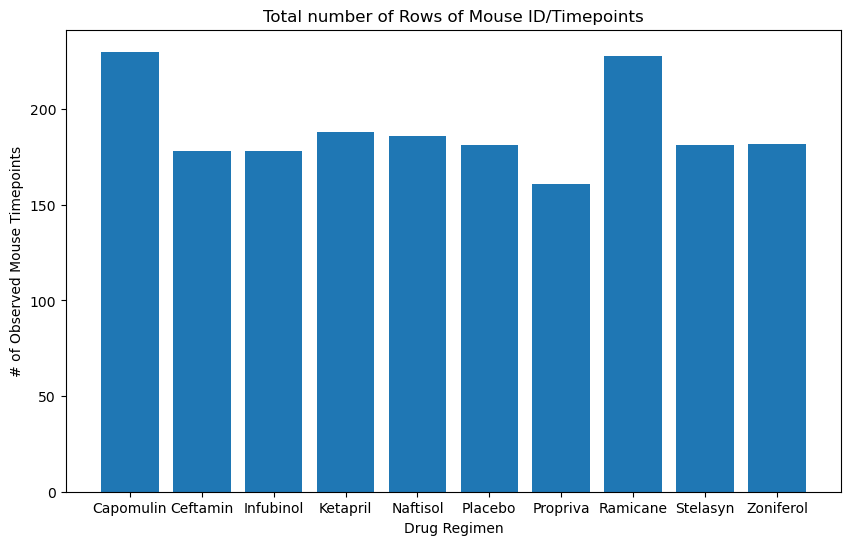

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_pyplot = mouse_study_data.groupby("Drug Regimen").size()

plt.figure(figsize=(10, 6))
plt.bar(drug_counts_pyplot.index, drug_counts_pyplot.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total number of Rows of Mouse ID/Timepoints")
plt.show()


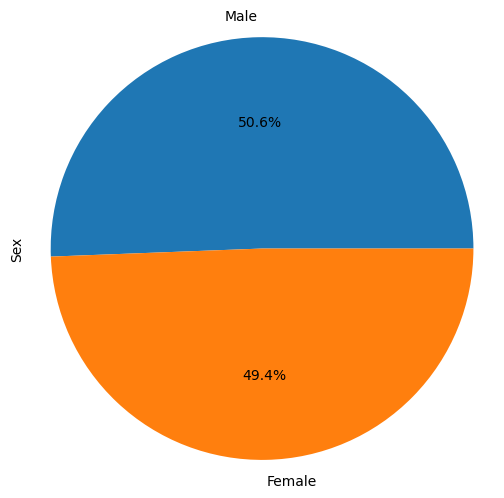

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution_pandas = mouse_study_data["Sex"].value_counts()

plt.figure(figsize=(6, 6))
sex_distribution_pandas.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

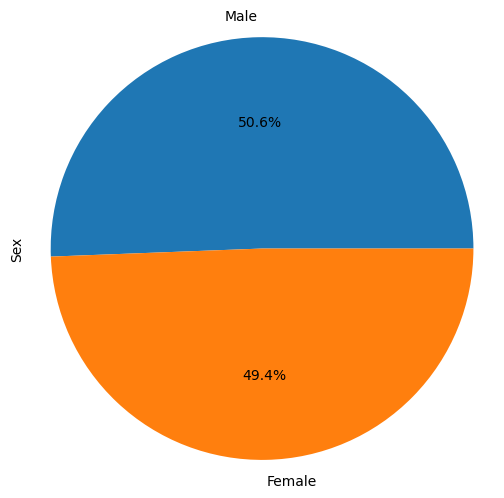

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution_pyplot = mouse_study_data["Sex"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_distribution_pyplot.values, labels=sex_distribution_pyplot.index, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_four_treatments_data = mouse_study_data[mouse_study_data["Drug Regimen"].isin(final_four_treatments)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = final_four_treatments_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_four_treatments_data, greatest_timepoint, on=["Mouse ID", "Timepoint"], how="inner")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_four_treatments_data["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds
for treatment in treatments:
    
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    print(f"{treatment}'s potential outliers:")
    if tumor_volumes.empty:
        print(tumor_volumes)
    else:
        print(tumor_volumes.reset_index(drop=True))

Ramicane's potential outliers:
0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.560470
6     31.095335
7     33.397653
8     32.978522
9     33.562402
10    36.134852
11    38.810366
12    37.225650
13    36.374510
14    36.561652
15    37.311236
16    38.342008
17    38.407618
18    40.659006
19    40.667713
20    45.220869
21    43.047543
22    43.419381
23    43.166373
24    44.183451
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers:
0     23.343598
1     28.484033
2     28.430964
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     37.311846
10    36.041047
11    37.074024
12    38.846876
13    38.939633
14    38.982878
15    38.753265
16    38.125164
17    39.952347
18    40.658124
19    40.159220
20    40.728578
21    41.483008
22    41.581521
23    47.685963
24    46.539206
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:
0     67.973419
1     6

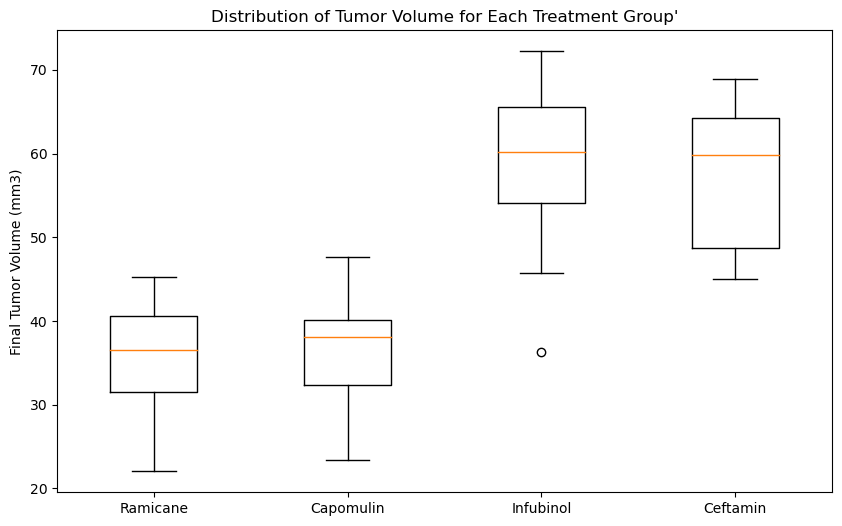

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = final_four_treatments_data["Drug Regimen"].unique().tolist()

tumor_volume_data = []

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(treatment_data)

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group'")
plt.show()

## Line and Scatter Plots

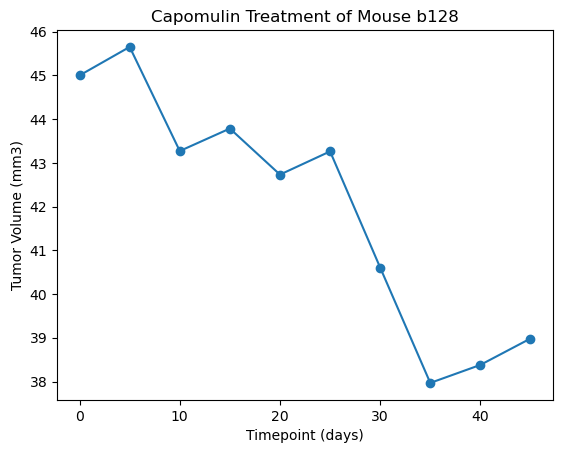

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "b128"
capomulin_data = mouse_study_data[(mouse_study_data["Drug Regimen"] == "Capomulin") & (mouse_study_data["Mouse ID"] == mouse_id)]

plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], "-o")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_22184\201327754.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data = capomulin_data.groupby("Mouse ID").mean()[["Tumor Volume (mm3)", "Weight (g)"]]


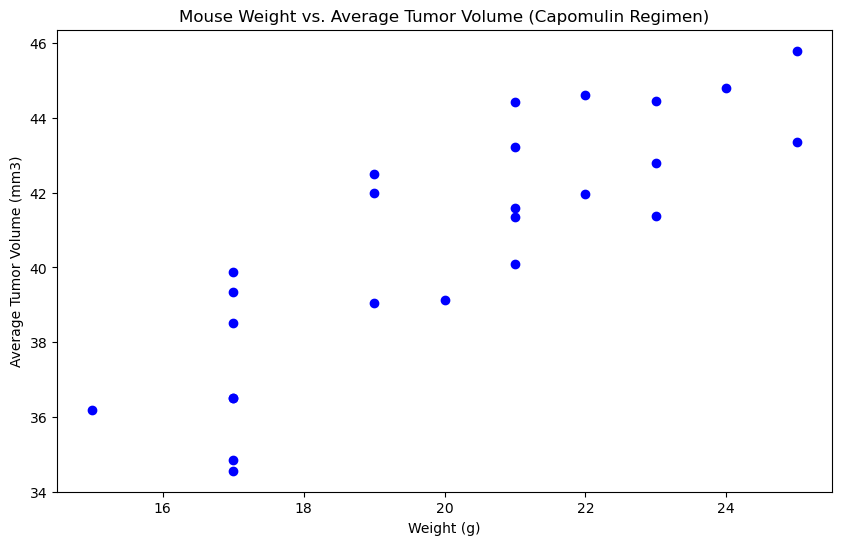

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_data[mouse_study_data["Drug Regimen"] == "Capomulin"]

average_data = capomulin_data.groupby("Mouse ID").mean()[["Tumor Volume (mm3)", "Weight (g)"]]

weight = average_data["Weight (g)"]
tumor_volume = average_data["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 6))
plt.scatter(weight, tumor_volume, marker="o", color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8343958614425954


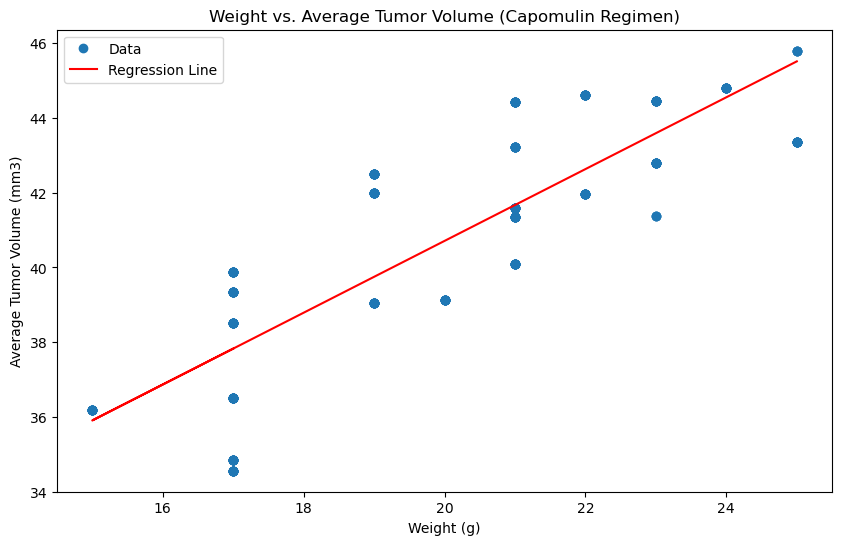

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study_data[mouse_study_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
average_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)

capomulin_avg_tumor_vol = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")

correlation_coef, _ = pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume (mm3)"])

print("The correlation between mouse weight and the average tumor volume is", correlation_coef)

plt.figure(figsize=(10, 6))
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Average Tumor Volume (mm3)"], 'o', label="Data")
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], intercept + slope * capomulin_avg_tumor_vol["Weight (g)"], 'r', label="Regression Line")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.legend()
plt.show()